# **Assignment 02** - Applied Machine Learning (CSE-845)
---
**Group Members:**
1. Abdur Rehman <br>
2. Ahmed Mujtaba <br>
3. Ayesha Ali <br>
4. Muhammad Abdur Rehman <br>

**Supervised By:**
Dr. Tariq Saeed

-----

**Q. Evaluate the following hypotheses using a multivariate linear regression model.**

1. Including all available features in the linear regression model will provide the most accurate predictions.

2. A linear regression model built using only features that are significantly correlated with the target variable will outperform the model using all features, as it focuses on the most relevant predictors.

3. Excluding features that exhibit multicollinearity from the linear regression model will yield better performance compared to both the all-features model and the correlated features model.

## Data Analysis and Preprocessing

Load and inspect the dataset.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/data.csv')
data

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
0,21.1,11.0,1.2,4.9,12,Snowy,9.8,2.9,1.1,20.4,300.2,22.5,5.1,28.0
1,49.7,19.0,5.9,2.5,5,Rainy,7.7,15.3,4.6,47.3,307.4,14.8,6.1,18.9
2,33.0,14.0,2.6,1.9,5,Clear,6.7,20.0,2.1,29.9,146.9,37.6,6.6,9.8
3,92.6,5.0,5.2,1.7,2,Snowy,1.5,18.6,2.5,91.1,314.1,37.4,9.2,17.2
4,12.2,5.0,0.9,6.1,11,Windy,9.5,14.2,1.2,11.7,407.3,0.6,5.3,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.9,10.0,14.3,2.9,2,Snowy,6.7,18.1,3.4,95.9,743.9,24.1,6.6,11.4
96,87.4,18.0,9.0,2.9,5,Snowy,2.6,11.3,4.7,91.6,598.7,36.9,8.7,19.1
97,26.7,3.0,2.8,3.7,6,Rainy,4.4,12.1,4.4,26.2,389.7,37.0,7.8,6.8
98,13.6,13.0,0.7,1.9,3,Clear,7.7,9.5,4.4,10.7,386.0,27.5,6.2,3.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Miles Travelled       99 non-null     float64
 1   Number of Deliveries  97 non-null     float64
 2   Petrol Consumed       96 non-null     float64
 3   Traffic Conditions    94 non-null     float64
 4   Number of Stops       100 non-null    int64  
 5   Weather Condition     100 non-null    object 
 6   Vehicle Age           97 non-null     float64
 7   Driver Experience     96 non-null     float64
 8   Road Quality          97 non-null     float64
 9   Delivery Distance     96 non-null     float64
 10  Vehicle Load          96 non-null     float64
 11  Temperature           97 non-null     float64
 12  Fuel Efficiency       94 non-null     float64
 13  Time Taken            98 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 11.1+ KB


According to the data info, the dataset contains a column, 'Weather Condition', containing categorical values (object), and multiple null values in various columns.

Data description tells us about the basic statistics for every column present in the dataframe. Note that while describing the data, the categorical column has been removed automatically becuase it contains Nan (Not a number) values.

In [ ]:
data.describe()

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
count,99.000000,97.000000,96.000000,94.000000,100.000000,97.000000,96.000000,97.000000,96.000000,96.000000,97.000000,94.000000,98.000000
mean,54.468687,9.814433,5.435417,3.745745,6.540000,5.992784,10.277083,3.112371,53.582292,498.673958,18.557732,6.982979,18.915306
std,25.403433,5.244700,3.110288,1.377598,4.178879,2.564714,5.906758,1.131118,26.073996,280.531748,15.067299,1.317185,8.536596
min,5.900000,1.000000,0.500000,1.400000,0.000000,1.300000,1.100000,1.100000,3.600000,105.700000,-9.500000,5.000000,0.600000
25%,34.000000,5.000000,3.000000,2.600000,3.000000,4.200000,4.950000,2.300000,31.925000,222.175000,6.800000,5.900000,12.175000
50%,53.800000,10.000000,5.150000,3.950000,6.000000,6.000000,10.050000,3.100000,51.800000,475.550000,18.300000,7.000000,18.850000
75%,75.450000,14.000000,7.625000,4.750000,10.000000,8.000000,15.400000,4.000000,75.050000,748.925000,32.900000,7.900000,24.500000
max,98.900000,19.000000,14.300000,6.600000,14.000000,10.000000,20.000000,5.000000,99.600000,995.800000,39.900000,9.500000,39.000000


Linear regression models require numerical input to build the model. To convert the categorical data in our column 'Weather Condition' to numerical format, we use Label Encoding, which is a machine learning technique for converting textual category labels into numerical values. Each unique label in a categorical feature is assigned a unique integer.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Weather Condition'] = le.fit_transform(data['Weather Condition'])
data

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
0,21.1,11.0,1.2,4.9,12,2,9.8,2.9,1.1,20.4,300.2,22.5,5.1,28.0
1,49.7,19.0,5.9,2.5,5,1,7.7,15.3,4.6,47.3,307.4,14.8,6.1,18.9
2,33.0,14.0,2.6,1.9,5,0,6.7,20.0,2.1,29.9,146.9,37.6,6.6,9.8
3,92.6,5.0,5.2,1.7,2,2,1.5,18.6,2.5,91.1,314.1,37.4,9.2,17.2
4,12.2,5.0,0.9,6.1,11,3,9.5,14.2,1.2,11.7,407.3,0.6,5.3,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.9,10.0,14.3,2.9,2,2,6.7,18.1,3.4,95.9,743.9,24.1,6.6,11.4
96,87.4,18.0,9.0,2.9,5,2,2.6,11.3,4.7,91.6,598.7,36.9,8.7,19.1
97,26.7,3.0,2.8,3.7,6,1,4.4,12.1,4.4,26.2,389.7,37.0,7.8,6.8
98,13.6,13.0,0.7,1.9,3,0,7.7,9.5,4.4,10.7,386.0,27.5,6.2,3.0


In order to view the mapping, we will convert the mapped items to a dataframe using pandas

In [ ]:
# Show mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
mapping = pd.DataFrame(mapping.items(), columns=['Category', 'Encoded Value'])
mapping

,Category,Encoded Value
0,Clear,0
1,Rainy,1
2,Snowy,2
3,Windy,3


To handle the missing values, we will use the Simple Imputer function to replace all missing values in the dataset with the mean of their respective columns

In [ ]:
#for imputing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Miles Travelled       100 non-null    float64
 1   Number of Deliveries  100 non-null    float64
 2   Petrol Consumed       100 non-null    float64
 3   Traffic Conditions    100 non-null    float64
 4   Number of Stops       100 non-null    float64
 5   Weather Condition     100 non-null    float64
 6   Vehicle Age           100 non-null    float64
 7   Driver Experience     100 non-null    float64
 8   Road Quality          100 non-null    float64
 9   Delivery Distance     100 non-null    float64
 10  Vehicle Load          100 non-null    float64
 11  Temperature           100 non-null    float64
 12  Fuel Efficiency       100 non-null    float64
 13  Time Taken            100 non-null    float64
dtypes: float64(14)
memory usage: 11.1 KB


After preprocessing, we display our final dataset.

In [ ]:
data

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
0,21.1,11.0,1.2,4.9,12.0,2.0,9.8,2.9,1.1,20.4,300.2,22.5,5.1,28.0
1,49.7,19.0,5.9,2.5,5.0,1.0,7.7,15.3,4.6,47.3,307.4,14.8,6.1,18.9
2,33.0,14.0,2.6,1.9,5.0,0.0,6.7,20.0,2.1,29.9,146.9,37.6,6.6,9.8
3,92.6,5.0,5.2,1.7,2.0,2.0,1.5,18.6,2.5,91.1,314.1,37.4,9.2,17.2
4,12.2,5.0,0.9,6.1,11.0,3.0,9.5,14.2,1.2,11.7,407.3,0.6,5.3,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.9,10.0,14.3,2.9,2.0,2.0,6.7,18.1,3.4,95.9,743.9,24.1,6.6,11.4
96,87.4,18.0,9.0,2.9,5.0,2.0,2.6,11.3,4.7,91.6,598.7,36.9,8.7,19.1
97,26.7,3.0,2.8,3.7,6.0,1.0,4.4,12.1,4.4,26.2,389.7,37.0,7.8,6.8
98,13.6,13.0,0.7,1.9,3.0,0.0,7.7,9.5,4.4,10.7,386.0,27.5,6.2,3.0


Next, we develop a pairwise scatter plot (or scatter plot matrix) which shows the distribution of individual variables and the relationships between all pairs of variables in a dataset. On the diagonal, you see histograms showing the distribution of each single variable. In the off-diagonal cells, you find scatter plots revealing patterns, trends, potential correlations (positive, negative, or none), and outliers between each pair of different variables. For this assigment, this plot is just used for visualization purpose.

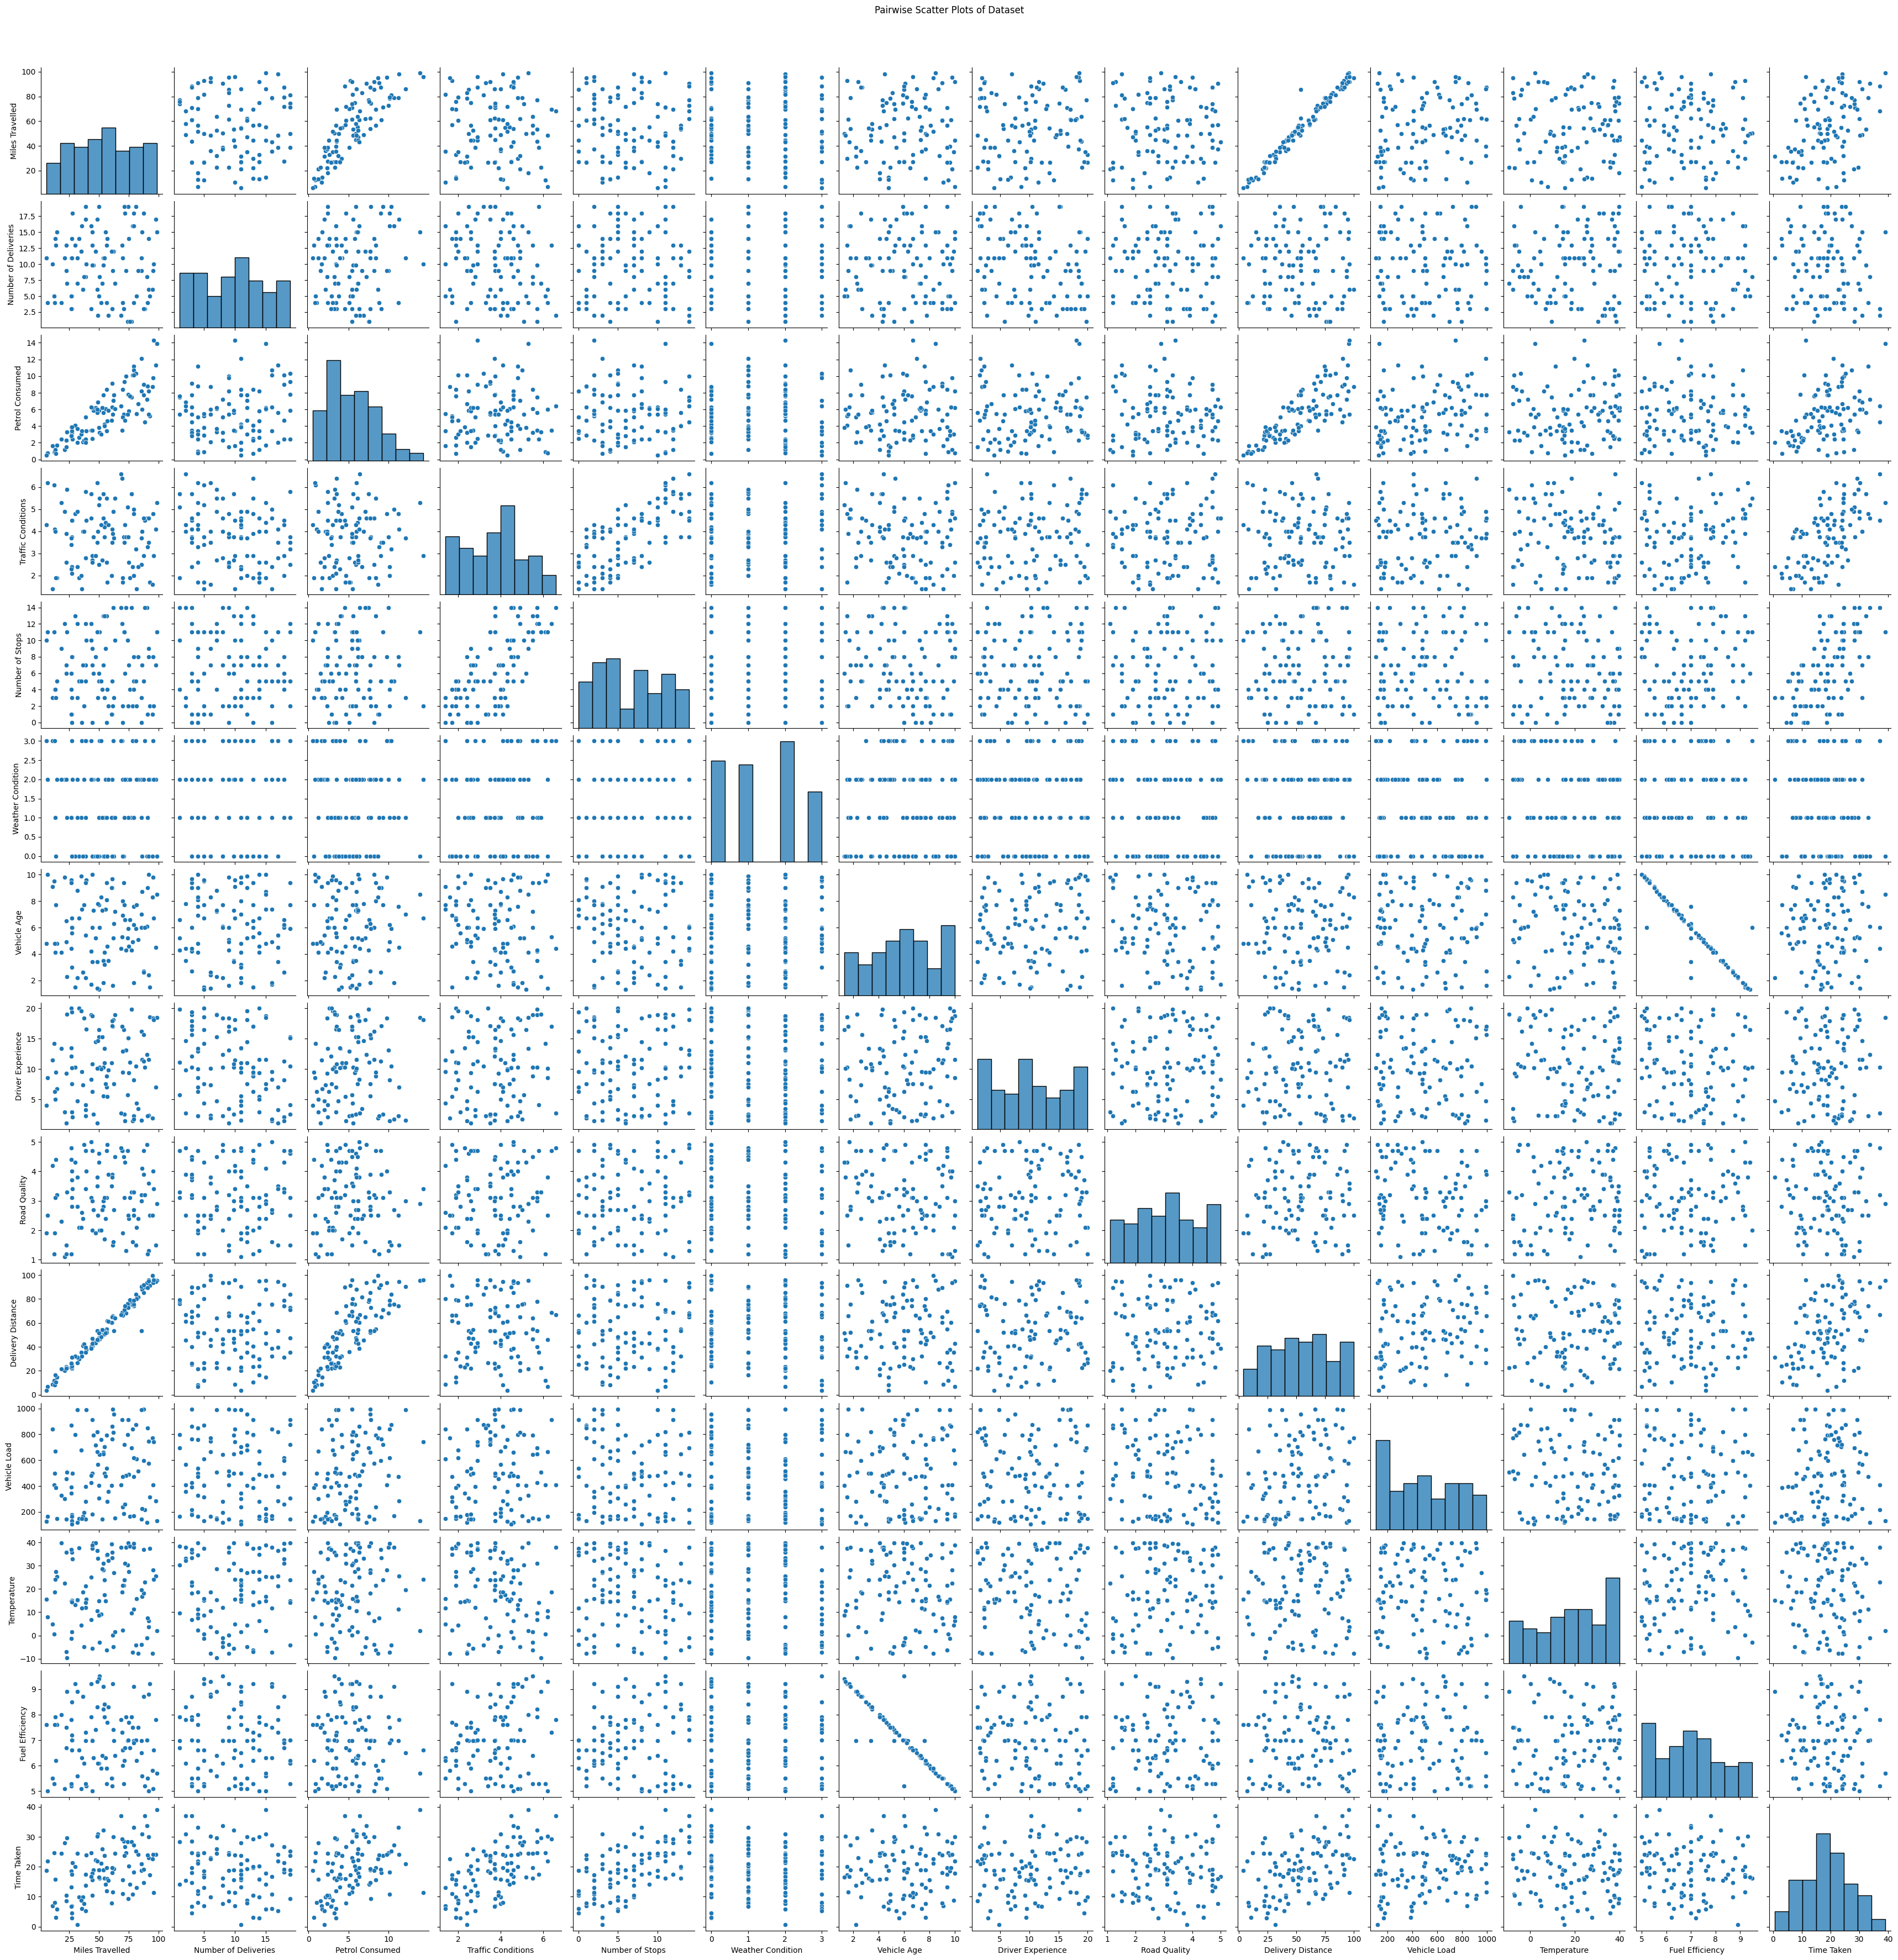

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.suptitle('Pairwise Scatter Plots of Dataset', y=1.02)
plt.show()

##Hypothesis 01

Including all available features in the linear regression model will provide the most accurate predictions.

### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 'Time Taken' is the target variable and the rest are features
X = data.drop('Time Taken', axis=1)
y = data['Time Taken']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training for hypothesis 1 complete.")

Model training for hypothesis 1 complete.


### Performance Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 3.03
Mean Squared Error (MSE): 14.47
Root Mean Squared Error (RMSE): 3.80
R-squared (R2): 0.76


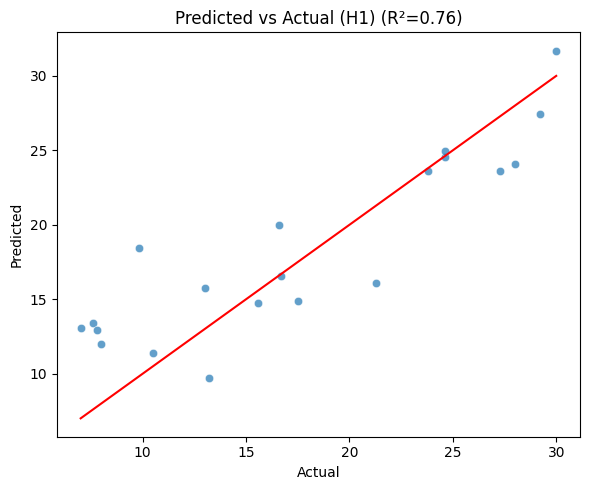

In [ ]:
# Plot Predicted vs Actual for Model 1
plt.figure(figsize=(6,5))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual (H1) (R²={r2_score(y_test, y_pred):.2f})")

plt.tight_layout()
plt.show()

##Hypothesis 02

A linear regression model built using only features that are significantly correlated with the target variable will outperform the model using all features, as it focuses on the most relevant predictors.

In order to find the correlation of feature variables with the target, we will generate a correlation matrix, and visulaize through a heatmap.

In [ ]:
corr_matrix = data.corr()
corr_matrix

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
Miles Travelled,1.000000,0.007450,0.821625,-0.038920,-0.020822,-0.062438,-0.008853,0.039321,0.024712,0.985489,0.199046,0.003269,0.002707,0.441436
Number of Deliveries,0.007450,1.000000,0.132451,-0.192743,0.011483,-0.058015,-0.004381,-0.237504,-0.013673,0.008745,-0.007790,0.060352,0.014197,-0.130603
Petrol Consumed,0.821625,0.132451,1.000000,-0.004137,-0.013748,-0.109052,0.022823,0.038151,-0.034639,0.799696,0.237287,0.038674,-0.013080,0.400869
Traffic Conditions,-0.038920,-0.192743,-0.004137,1.000000,0.692331,0.099991,-0.121227,0.087823,0.044438,-0.026413,0.110984,-0.158226,0.159731,0.613492
Number of Stops,-0.020822,0.011483,-0.013748,0.692331,1.000000,0.108672,-0.117492,0.017762,0.083209,0.005997,-0.026725,-0.121586,0.111209,0.621255
Weather Condition,-0.062438,-0.058015,-0.109052,0.099991,0.108672,1.000000,0.039674,-0.019033,-0.092170,-0.067633,-0.015674,-0.118243,-0.020953,-0.002165
Vehicle Age,-0.008853,-0.004381,0.022823,-0.121227,-0.117492,0.039674,1.000000,0.137374,-0.107249,-0.028014,0.004411,-0.084415,-0.950680,0.054350
Driver Experience,0.039321,-0.237504,0.038151,0.087823,0.017762,-0.019033,0.137374,1.000000,0.075155,0.027796,-0.012938,-0.098456,-0.120793,0.060400
Road Quality,0.024712,-0.013673,-0.034639,0.044438,0.083209,-0.092170,-0.107249,0.075155,1.000000,0.041649,-0.188751,0.149245,0.040603,-0.021218
Delivery Distance,0.985489,0.008745,0.799696,-0.026413,0.005997,-0.067633,-0.028014,0.027796,0.041649,1.000000,0.212476,0.010965,0.016310,0.447485


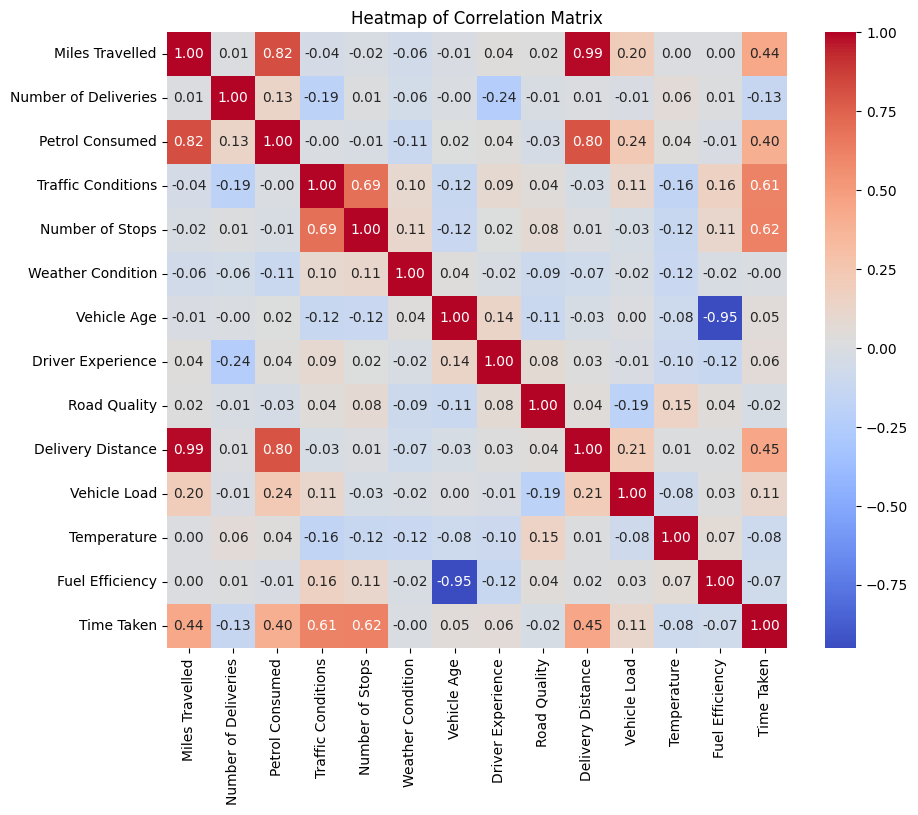

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Extract the features having correlation with the target variable

In [ ]:
target = "Time Taken"
corr_with_target = corr_matrix[target].drop(target)
# Convert to DataFrame
corr_df = corr_with_target.reset_index()
corr_df.columns = ['Feature', 'Correlation with ' + target]
corr_df.sort_values(by=corr_df.columns[1], ascending=False, inplace=True)

corr_df

,Feature,Correlation with Time Taken
4,Number of Stops,0.621255
3,Traffic Conditions,0.613492
9,Delivery Distance,0.447485
0,Miles Travelled,0.441436
2,Petrol Consumed,0.400869
10,Vehicle Load,0.111619
7,Driver Experience,0.060400
6,Vehicle Age,0.054350
5,Weather Condition,-0.002165
8,Road Quality,-0.021218


We applied a correlation filter with a threshold of 0.2 for selecting features (following Alomari et al., 2023), which has been used previously to reduce dimensionality while retaining informative predictors. However, we also tried a threshold of 0.3 and 0.4 which showed an increase in the values of MSE and MAE for this model.

In [ ]:
selected_features = corr_with_target[abs(corr_with_target) > 0.2].index.tolist()
print("Selected features:", selected_features)

Selected features: ['Miles Travelled', 'Petrol Consumed', 'Traffic Conditions', 'Number of Stops', 'Delivery Distance']


The final dataset for this model contains only the selected features and the target variable.

In [ ]:
data2 = data[selected_features + [target]]
data2

,Miles Travelled,Petrol Consumed,Traffic Conditions,Number of Stops,Delivery Distance,Time Taken
0,21.1,1.2,4.9,12.0,20.4,28.0
1,49.7,5.9,2.5,5.0,47.3,18.9
2,33.0,2.6,1.9,5.0,29.9,9.8
3,92.6,5.2,1.7,2.0,91.1,17.2
4,12.2,0.9,6.1,11.0,11.7,24.6
...,...,...,...,...,...,...
95,95.9,14.3,2.9,2.0,95.9,11.4
96,87.4,9.0,2.9,5.0,91.6,19.1
97,26.7,2.8,3.7,6.0,26.2,6.8
98,13.6,0.7,1.9,3.0,10.7,3.0


### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 'Time Taken' is the target variable and the rest are selected features
X = data2.drop('Time Taken', axis=1)
y = data2['Time Taken']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training for hypothesis 2 complete.")

Model training for hypothesis 2 complete.


### Performance Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred2 = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred2)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 15.50
Root Mean Squared Error (RMSE): 3.94
R-squared (R2): 0.74


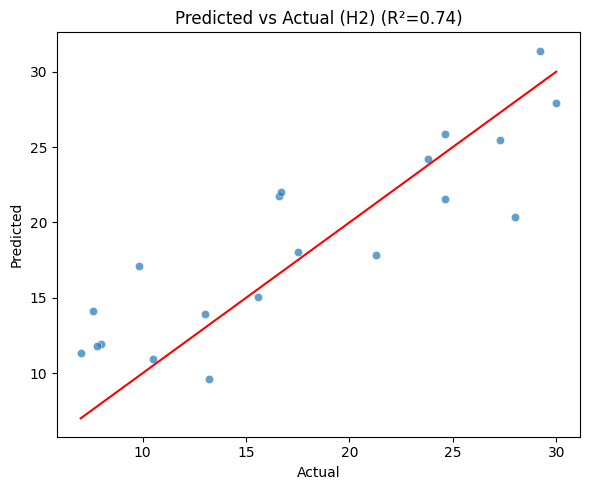

In [ ]:
# Plot Predicted vs Actual for Model 2
plt.figure(figsize=(6,5))

sns.scatterplot(x=y_test, y=y_pred2, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual (H2) (R²={r2_score(y_test, y_pred2):.2f})")

plt.tight_layout()
plt.show()

##Hypothesis 03

Excluding features that exhibit multicollinearity from the linear regression model will yield better performance compared to both the all-features model and the correlated features model.

Since multicollinearity is a check of correlation between the feature variables, we will start by dropping the target column in the dataset and generate a correlation matrix for all the feature variables.

In [ ]:
features = data.drop('Time Taken', axis=1)
features

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency
0,21.1,11.0,1.2,4.9,12.0,2.0,9.8,2.9,1.1,20.4,300.2,22.5,5.1
1,49.7,19.0,5.9,2.5,5.0,1.0,7.7,15.3,4.6,47.3,307.4,14.8,6.1
2,33.0,14.0,2.6,1.9,5.0,0.0,6.7,20.0,2.1,29.9,146.9,37.6,6.6
3,92.6,5.0,5.2,1.7,2.0,2.0,1.5,18.6,2.5,91.1,314.1,37.4,9.2
4,12.2,5.0,0.9,6.1,11.0,3.0,9.5,14.2,1.2,11.7,407.3,0.6,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.9,10.0,14.3,2.9,2.0,2.0,6.7,18.1,3.4,95.9,743.9,24.1,6.6
96,87.4,18.0,9.0,2.9,5.0,2.0,2.6,11.3,4.7,91.6,598.7,36.9,8.7
97,26.7,3.0,2.8,3.7,6.0,1.0,4.4,12.1,4.4,26.2,389.7,37.0,7.8
98,13.6,13.0,0.7,1.9,3.0,0.0,7.7,9.5,4.4,10.7,386.0,27.5,6.2


We will build two model for Hypothesis 03, because there are two ways to address multicollinearity in the dataset. Model 3A will use correlation matrix, and model 3B will use VIF to detect multicollinearity and remove features with high VIF values.

### Part A - Correlation Matrix

In [ ]:
corr_matrix2 = features.corr()
corr_matrix2

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency
Miles Travelled,1.000000,0.007450,0.821625,-0.038920,-0.020822,-0.062438,-0.008853,0.039321,0.024712,0.985489,0.199046,0.003269,0.002707
Number of Deliveries,0.007450,1.000000,0.132451,-0.192743,0.011483,-0.058015,-0.004381,-0.237504,-0.013673,0.008745,-0.007790,0.060352,0.014197
Petrol Consumed,0.821625,0.132451,1.000000,-0.004137,-0.013748,-0.109052,0.022823,0.038151,-0.034639,0.799696,0.237287,0.038674,-0.013080
Traffic Conditions,-0.038920,-0.192743,-0.004137,1.000000,0.692331,0.099991,-0.121227,0.087823,0.044438,-0.026413,0.110984,-0.158226,0.159731
Number of Stops,-0.020822,0.011483,-0.013748,0.692331,1.000000,0.108672,-0.117492,0.017762,0.083209,0.005997,-0.026725,-0.121586,0.111209
Weather Condition,-0.062438,-0.058015,-0.109052,0.099991,0.108672,1.000000,0.039674,-0.019033,-0.092170,-0.067633,-0.015674,-0.118243,-0.020953
Vehicle Age,-0.008853,-0.004381,0.022823,-0.121227,-0.117492,0.039674,1.000000,0.137374,-0.107249,-0.028014,0.004411,-0.084415,-0.950680
Driver Experience,0.039321,-0.237504,0.038151,0.087823,0.017762,-0.019033,0.137374,1.000000,0.075155,0.027796,-0.012938,-0.098456,-0.120793
Road Quality,0.024712,-0.013673,-0.034639,0.044438,0.083209,-0.092170,-0.107249,0.075155,1.000000,0.041649,-0.188751,0.149245,0.040603
Delivery Distance,0.985489,0.008745,0.799696,-0.026413,0.005997,-0.067633,-0.028014,0.027796,0.041649,1.000000,0.212476,0.010965,0.016310


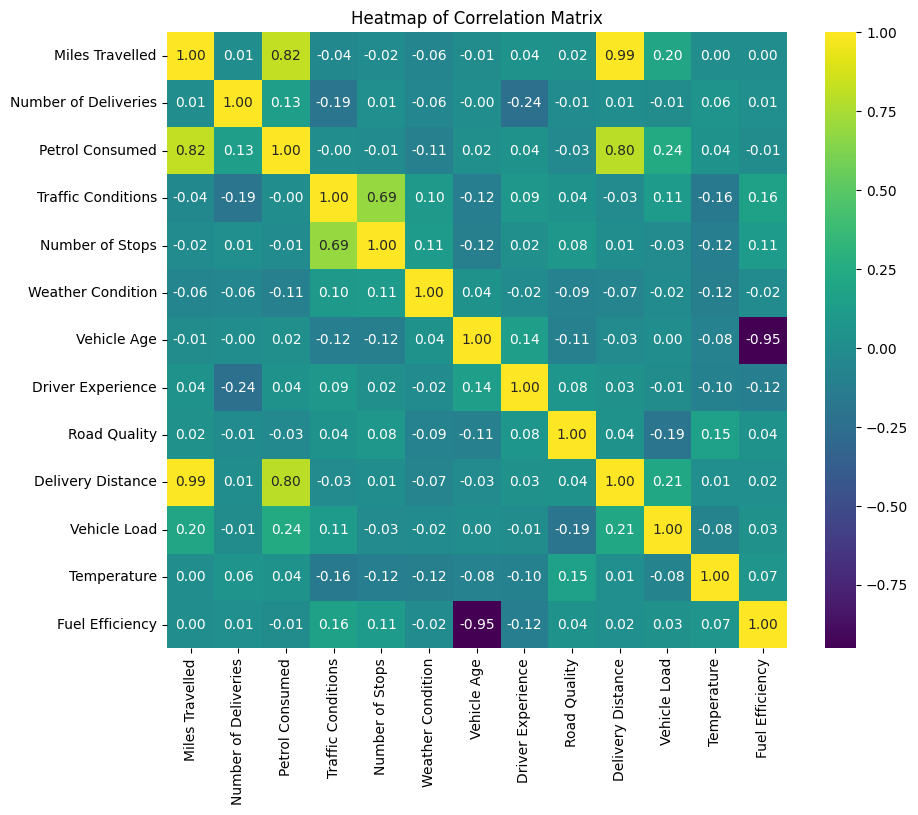

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, cmap='viridis', annot=True, fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

We will drop the features having multicollinearity values above threshold 0.8. We set a threshold of |r| = 0.8 for correlation to flag potential multicollinearity, following common practice in regression diagnostics (e.g. Senaviratna & Cooray, 2020).

In [ ]:
# Set cutoff
threshold = 0.8

# Create an upper triangular mask (so we don’t double count correlations)
upper = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))

# Find columns with correlation above threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Keep only features below cutoff
selected_features_H3 = [col for col in corr_matrix2.columns if col not in to_drop]

print("Dropped features (due to multicollinearity):", to_drop)
print("Selected features:", selected_features_H3)

Dropped features (due to multicollinearity): ['Petrol Consumed', 'Delivery Distance', 'Fuel Efficiency']
Selected features: ['Miles Travelled', 'Number of Deliveries', 'Traffic Conditions', 'Number of Stops', 'Weather Condition', 'Vehicle Age', 'Driver Experience', 'Road Quality', 'Vehicle Load', 'Temperature']


Now we will visualize the correlation between only the selected features.

In [ ]:
# Create a new DataFrame with only the selected features
selected_features_df = data[selected_features_H3]

# Calculate the correlation matrix for the selected features
selected_features_corr = selected_features_df.corr()

print("Correlation matrix for selected features (H3):")
selected_features_corr

Correlation matrix for selected features (H3):


,Miles Travelled,Number of Deliveries,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Vehicle Load,Temperature
Miles Travelled,1.000000,0.007450,-0.038920,-0.020822,-0.062438,-0.008853,0.039321,0.024712,0.199046,0.003269
Number of Deliveries,0.007450,1.000000,-0.192743,0.011483,-0.058015,-0.004381,-0.237504,-0.013673,-0.007790,0.060352
Traffic Conditions,-0.038920,-0.192743,1.000000,0.692331,0.099991,-0.121227,0.087823,0.044438,0.110984,-0.158226
Number of Stops,-0.020822,0.011483,0.692331,1.000000,0.108672,-0.117492,0.017762,0.083209,-0.026725,-0.121586
Weather Condition,-0.062438,-0.058015,0.099991,0.108672,1.000000,0.039674,-0.019033,-0.092170,-0.015674,-0.118243
Vehicle Age,-0.008853,-0.004381,-0.121227,-0.117492,0.039674,1.000000,0.137374,-0.107249,0.004411,-0.084415
Driver Experience,0.039321,-0.237504,0.087823,0.017762,-0.019033,0.137374,1.000000,0.075155,-0.012938,-0.098456
Road Quality,0.024712,-0.013673,0.044438,0.083209,-0.092170,-0.107249,0.075155,1.000000,-0.188751,0.149245
Vehicle Load,0.199046,-0.007790,0.110984,-0.026725,-0.015674,0.004411,-0.012938,-0.188751,1.000000,-0.081463
Temperature,0.003269,0.060352,-0.158226,-0.121586,-0.118243,-0.084415,-0.098456,0.149245,-0.081463,1.000000


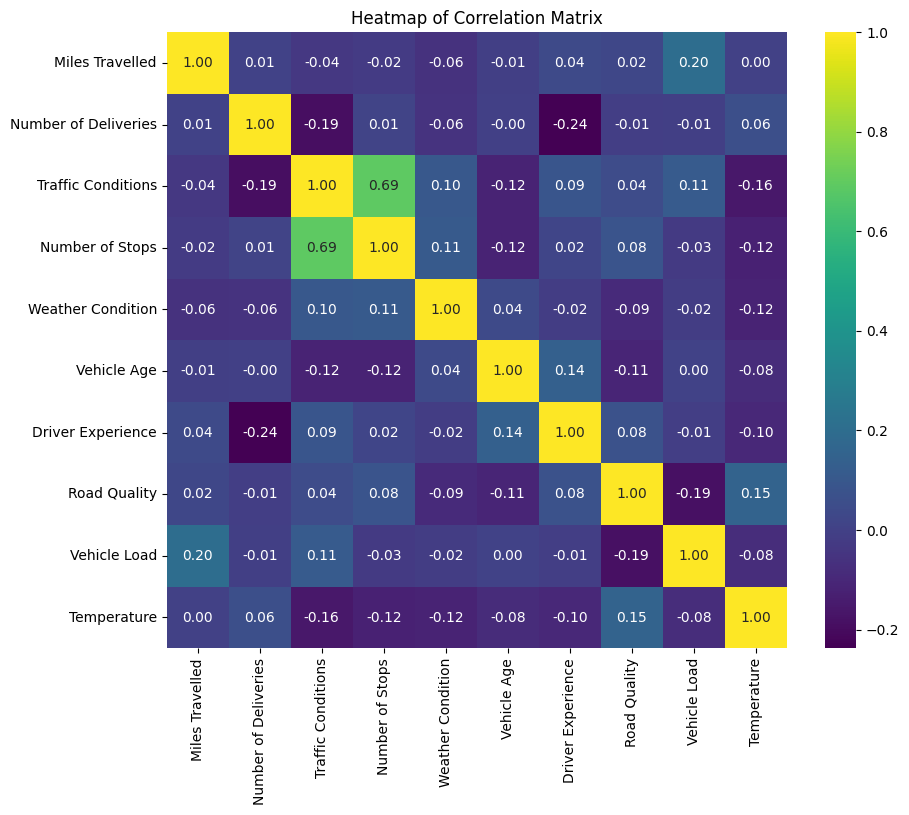

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(selected_features_corr, cmap='viridis', annot=True, fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 'Time Taken' is the target variable and the rest are selected features
X = selected_features_df
y = data['Time Taken']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training for hypothesis 3A complete.")

Model training for hypothesis 3A complete.


#### Performance Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred3A = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred3A)
mse = mean_squared_error(y_test, y_pred3A)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3A)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 3.25
Mean Squared Error (MSE): 15.40
Root Mean Squared Error (RMSE): 3.92
R-squared (R2): 0.74


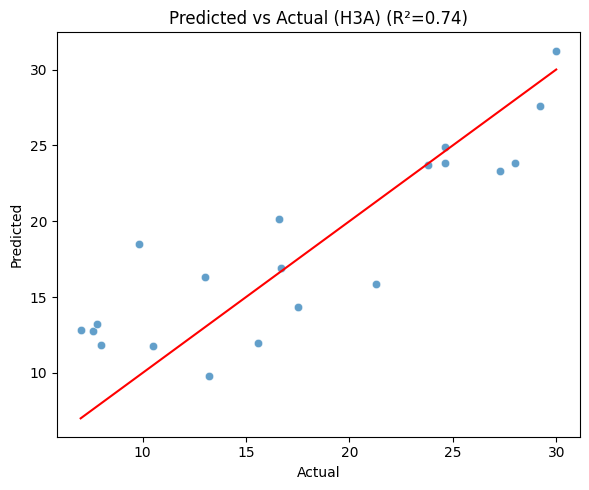

In [ ]:
# Plot Predicted vs Actual for Model 3A
plt.figure(figsize=(6,5))

sns.scatterplot(x=y_test, y=y_pred3A, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual (H3A) (R²={r2_score(y_test, y_pred3A):.2f})")

plt.tight_layout()
plt.show()

### Part B - VIF

In [ ]:
X = features

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Calculate VIF
X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

print("VIF values:\n", vif)

VIF values:
                  feature         VIF
0                  const  722.168364
1        Miles Travelled   41.710693
2   Number of Deliveries    1.230650
3        Petrol Consumed    3.489333
4     Traffic Conditions    2.325464
5        Number of Stops    2.168150
6      Weather Condition    1.055842
7            Vehicle Age   11.599851
8      Driver Experience    1.116665
9           Road Quality    1.153415
10     Delivery Distance   37.845556
11          Vehicle Load    1.170702
12           Temperature    1.092595
13       Fuel Efficiency   11.494265


In [ ]:
# Rule: keep features with VIF < 5
selected_vif_features = vif[vif["VIF"] < 5]["feature"].tolist()

# remove constant if still in the list
if "const" in selected_vif_features:
    selected_vif_features.remove("const")

print("Features kept after removing multicollinearity:", selected_vif_features, )

Features kept after removing multicollinearity: ['Number of Deliveries', 'Petrol Consumed', 'Traffic Conditions', 'Number of Stops', 'Weather Condition', 'Driver Experience', 'Road Quality', 'Vehicle Load', 'Temperature']


#### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = features[selected_vif_features]
y = data['Time Taken']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training for hypothesis 3B complete.")

Model training for hypothesis 3B complete.


#### Performance Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred3B = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred3B)
mse = mean_squared_error(y_test, y_pred3B)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3B)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 3.83
Mean Squared Error (MSE): 21.43
Root Mean Squared Error (RMSE): 4.63
R-squared (R2): 0.64


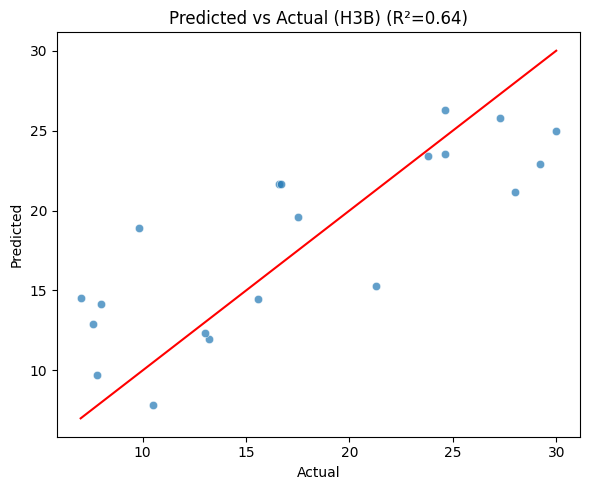

In [ ]:
# Plot Predicted vs Actual
plt.figure(figsize=(6,5))

sns.scatterplot(x=y_test, y=y_pred3B, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual (H3B) (R²={r2_score(y_test, y_pred3B):.2f})")

plt.tight_layout()
plt.show()

## Performance Comparison

In [ ]:
import pandas as pd
# Gather the performance metrics from each model's evaluation
results = {
    'Model': ['H1 (All Features)', 'H2 (Correlated Features)', 'H3A (Multicollinearity - Corr)', 'H3B (Multicollinearity - VIF)'],
    'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred2), mean_absolute_error(y_test, y_pred3A), mean_absolute_error(y_test, y_pred3B)],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred2), mean_squared_error(y_test, y_pred3A), mean_squared_error(y_test, y_pred3B)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_test, y_pred2)), np.sqrt(mean_squared_error(y_test, y_pred3A)), np.sqrt(mean_squared_error(y_test, y_pred3B))],
    'R2': [r2_score(y_test, y_pred), r2_score(y_test, y_pred2), r2_score(y_test, y_pred3A), r2_score(y_test, y_pred3B)]
}

results_df = pd.DataFrame(results)

print("Model Performance Evaluation:")
display(results_df)

Model Performance Evaluation:


,Model,MAE,MSE,RMSE,R2
0,H1 (All Features),3.033945,14.468090,3.803694,0.758634
1,H2 (Correlated Features),3.225993,15.498681,3.936836,0.741441
2,H3A (Multicollinearity - Corr),3.254052,15.395207,3.923673,0.743167
3,H3B (Multicollinearity - VIF),3.833279,21.430127,4.629269,0.642488
